# Clustering Notebook for Doc2Vec
#### Author: Andrew Auyeung
The goal of this notebook is to find clusters in the TDS Doc2Vec vectors. 
Each proccess will generate subsamples of the dataset and try different hyperparameter tuning of the model. 

In [ ]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models.doc2vec import Doc2Vec
from vis_util import *

In [2]:
# Load Model
model = Doc2Vec.load('../models/d2v.model')

In [3]:
# Load articles
articles = pd.read_csv('../src/TDS_articles.csv', sep='\t', index_col=0)

### Helper Functions to assist in visualizing cluster unity

The document vectors are stored in the model in a 35000 x 300 array. 
Each vector is tagged with the article_id that associataes back to the article information in the *articles* dataframe.
To check if the topics are clustered similarly, we need to generate a list of the document titles indexed in the same order as the document vectors. 


In [4]:
titles_ = []
for idx in range(len(model.docvecs.vectors_docs)):
    titles_.append(articles.loc[int(model.docvecs.index_to_doctag(idx))]['title'])
titles_ = np.array(titles_)

## KMeans Hyperparameter Tuning
* Finding a good elbow 
* Using NLTK Kmeans to allow for cosine metric

In [76]:
from nltk.cluster import KMeansClusterer, cosine_distance
from sklearn.model_selection import ShuffleSplit

In [75]:
def kmeans_inertia(X, clusters):
    """
    Calculate Kmeans Inertia for nltk's clustering
    """
    sum_ = []
    for i in np.unique(clusters):
        ith_cluster = X[clusters==i] # get vectors in the current cluster
        centroid = np.mean(ith_cluster, axis=0) # calculate centroid for that cluster
        sum_.append(np.sum(np.sum((ith_cluster - centroid)**2, axis=1), axis=0)) # append sum of inertia for that cluster to sum list
    return np.sum(sum_)

In [78]:
random_shuffle = ShuffleSplit(n_splits=max_means, train_size=0.7, test_size=None)


In [88]:
train = model.docvecs.vectors_docs

In [89]:
max_means = 20
# Set up Shuffle Split to randomly sample training data for the iteration 
shuffle = ShuffleSplit(n_splits=max_means, train_size=0.5, test_size=None).split(train)
inertias = []
for n in range(1, max_means):
    idx, _ = next(shuffle)
    clusterer = KMeansClusterer(num_means=n, distance=cosine_distance, repeats=5)
    clusters = np.array(clusterer.cluster(train[idx], True))
    print('Clusters Found, Calculating Inertias...')
    inertias.append(kmeans_inertia(train[idx], clusters))
    print(f"Finished finding Clusters for {n} means.\nCurrent Inertia Score was {inertias[-1]}")

Finished finding Clusters for 1 means.
Current Inertia Score was 10585647.0
Finished finding Clusters for 2 means.
Current Inertia Score was 10396001.0


KeyboardInterrupt: 

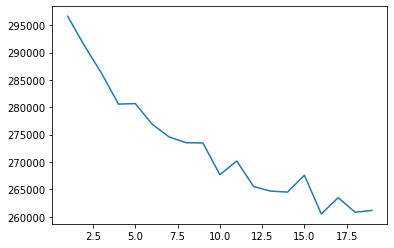

In [85]:
plt.plot(np.arange(1, max_means), inertias)

In [21]:
[:10000]

In [31]:
clusterer = KMeansClusterer(num_means=15, distance=cosine_distance, repeats=5)

In [48]:
clusters = np.array(clusterer.cluster(train, True))

In [49]:
np.unique(clusters)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [33]:
from sklearn.decomposition import PCA
pca_feat = PCA(2).fit_transform(train)

The average silhouette score is 0.006374884396791458


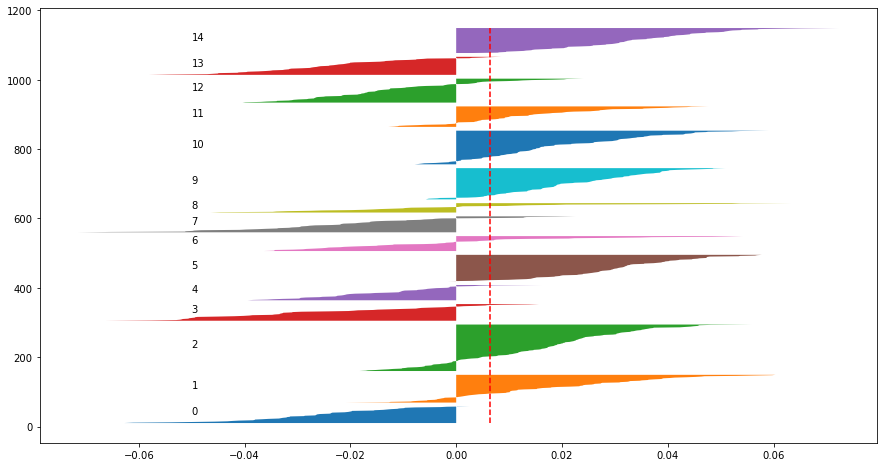

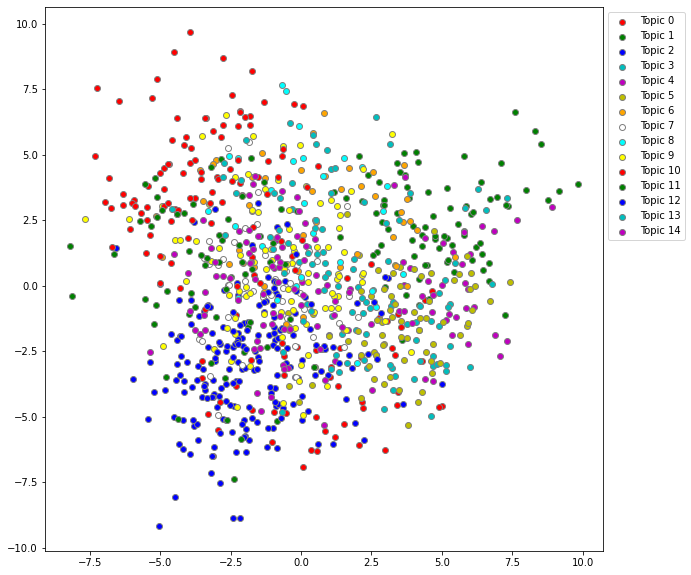

In [34]:
plot_silhouette(train, np.array(clusters))
plot_PCA_2D(pca_feat, np.array(clusters))

In [43]:
centroid = np.mean(train, axis=0)

In [71]:
np.sum(((train - centroid)**2), axis=1).shape

(1000,)

In [58]:
np.sum(np.sum(train, axis=1), axis=0)

-2246.6548

In [73]:
kmeans_inertia(train, np.array(clusters))

380184.1